In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

#### Data Setup

In [3]:
churn = pd.read_csv("/Users/nicole/Desktop/DataOrbit2025/Churn_Modelling.csv")
churn.isna().sum()
churn = churn.dropna()

In [4]:
churn.duplicated().sum()
churn = churn.drop_duplicates()

In [5]:
churn.head()
churn = churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
churn.head()
churn.shape

(9996, 11)

In [7]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### EDA

In [ ]:
churn.describe()

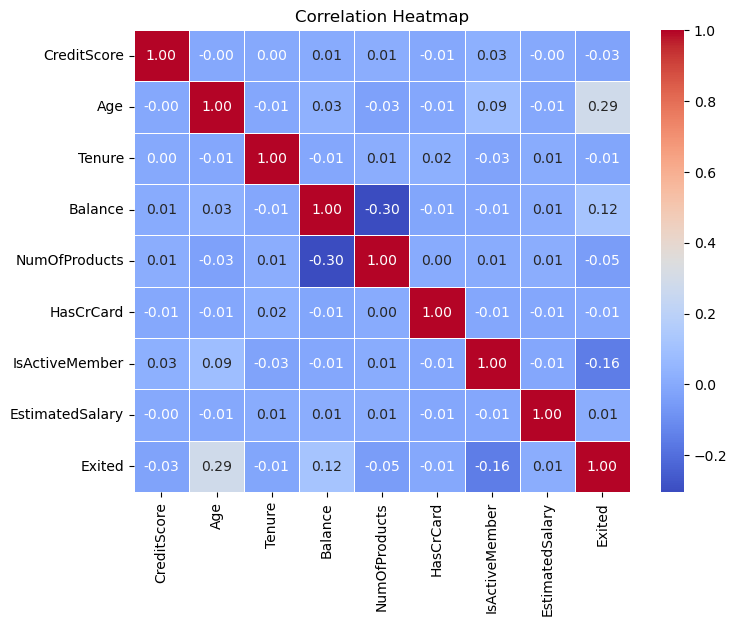

In [8]:
corr = churn.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### Catgorical Variables

In [9]:
numerical_columns = churn.select_dtypes(include=["int64", "float64"]).columns
numerical_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

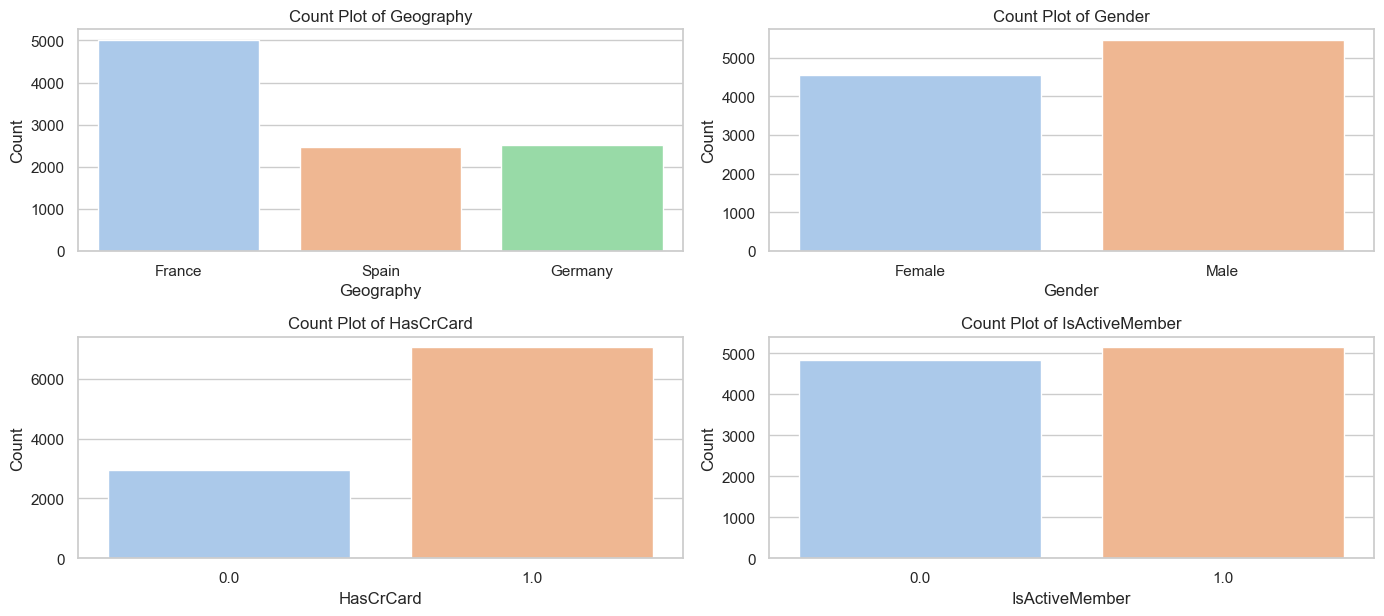

In [10]:
sns.set(style="whitegrid")

num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Categorical variables 
plt.figure(figsize=(14, len(cat_vars)*3))
for idx, var in enumerate(cat_vars, 1):
    plt.subplot(len(cat_vars), 2, idx)
    sns.countplot(x=var, data=churn, palette='pastel')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


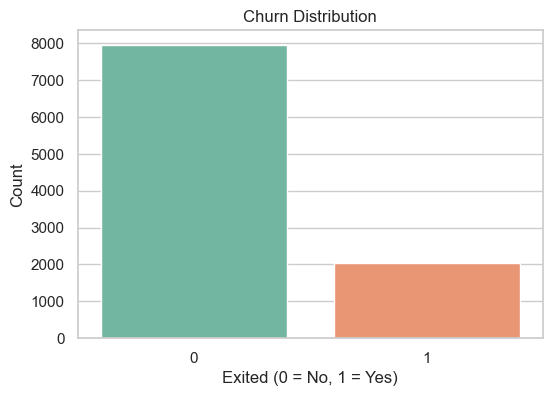

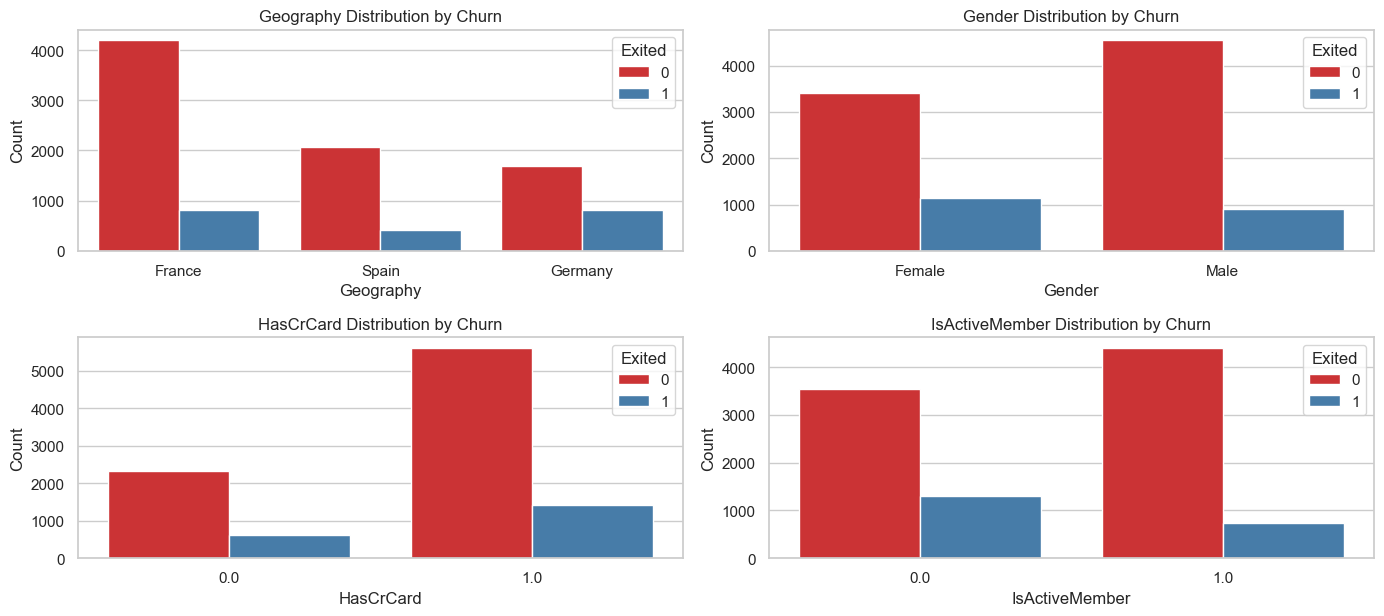

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=churn, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, len(cat_vars)*3))
for idx, var in enumerate(cat_vars, 1):
    plt.subplot(len(cat_vars), 2, idx)
    sns.countplot(x=var, hue = "Exited", data=churn, palette='Set1')
    plt.title(f'{var} Distribution by Churn')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

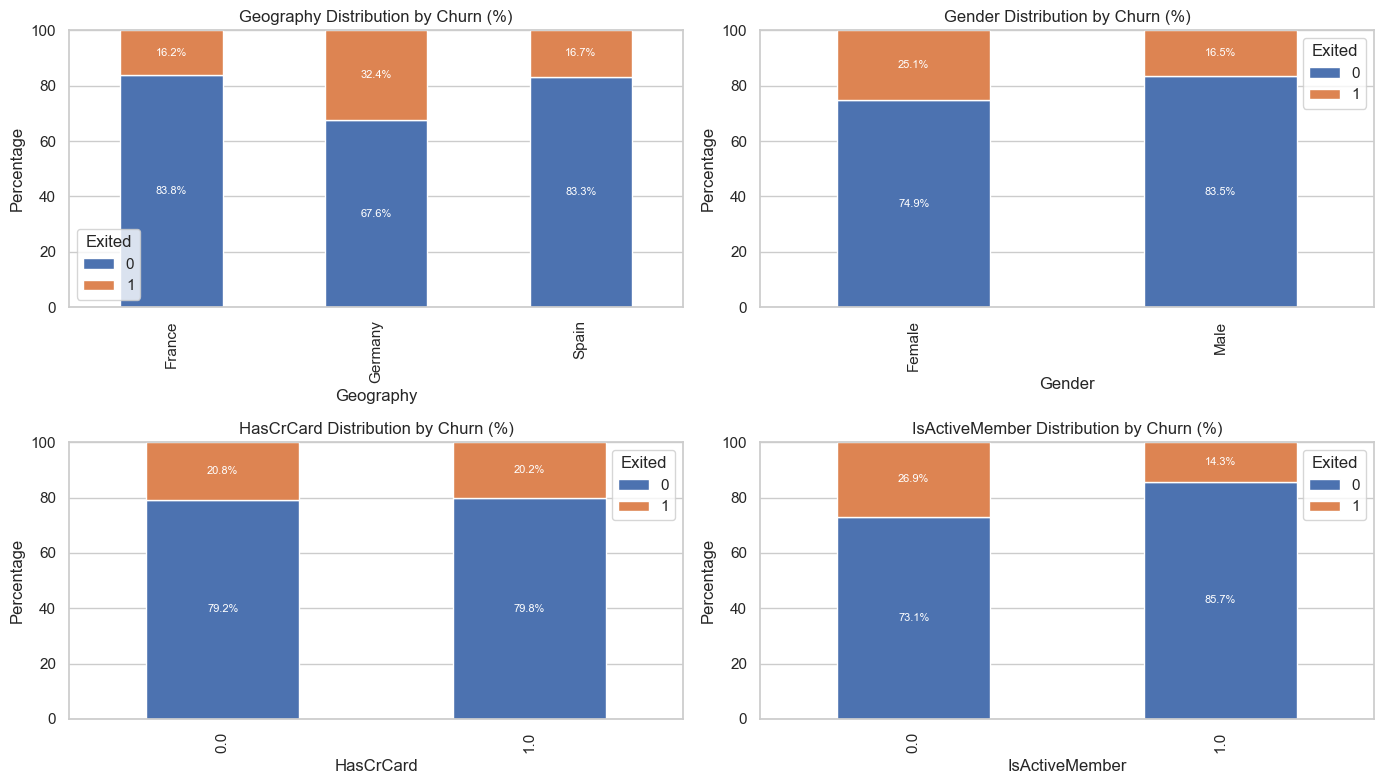

In [12]:
nrows = int(len(cat_vars) / 2)
fig = plt.figure(figsize=(14, 4 * nrows))

for idx, var in enumerate(cat_vars):
    ax = fig.add_subplot(nrows, 2, idx + 1)
    
    ctab = pd.crosstab(churn[var], churn["Exited"], normalize='index') * 100
    
    ctab.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title(f'{var} Distribution by Churn (%)')
    ax.set_xlabel(var)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100) 
    
    for container in ax.containers:
        for patch in container:
            height = patch.get_height()
            if height > 0:  # Only annotate visible segments
                x = patch.get_x() + patch.get_width() / 2
                y = patch.get_y() + height / 2
                ax.text(
                    x, y, 
                    f'{height:.1f}%', 
                    ha='center', va='center', 
                    color='white', fontsize=8
                )

plt.tight_layout()
plt.show()

#### Numerical Variables

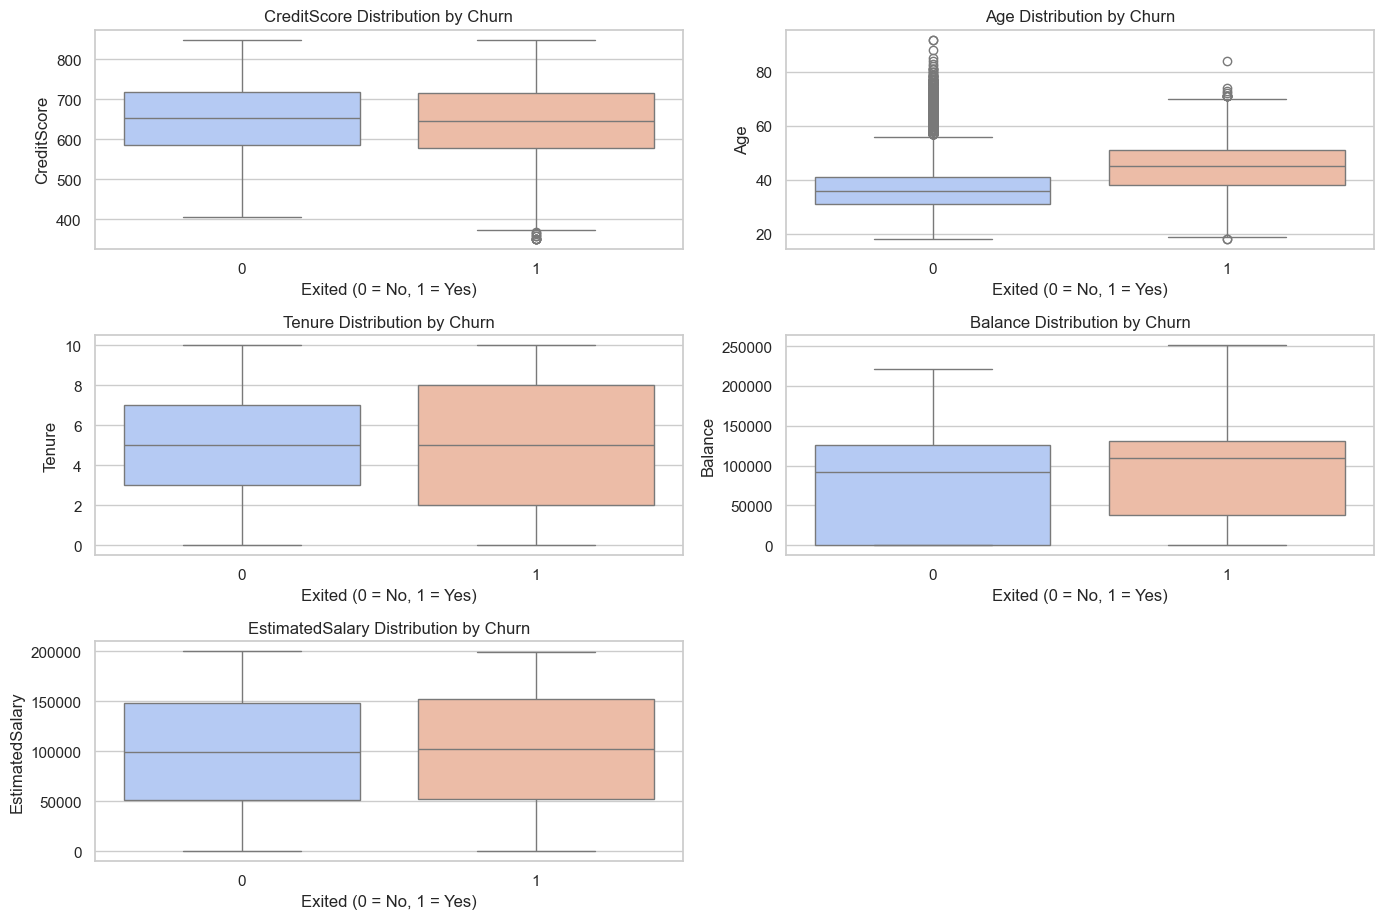

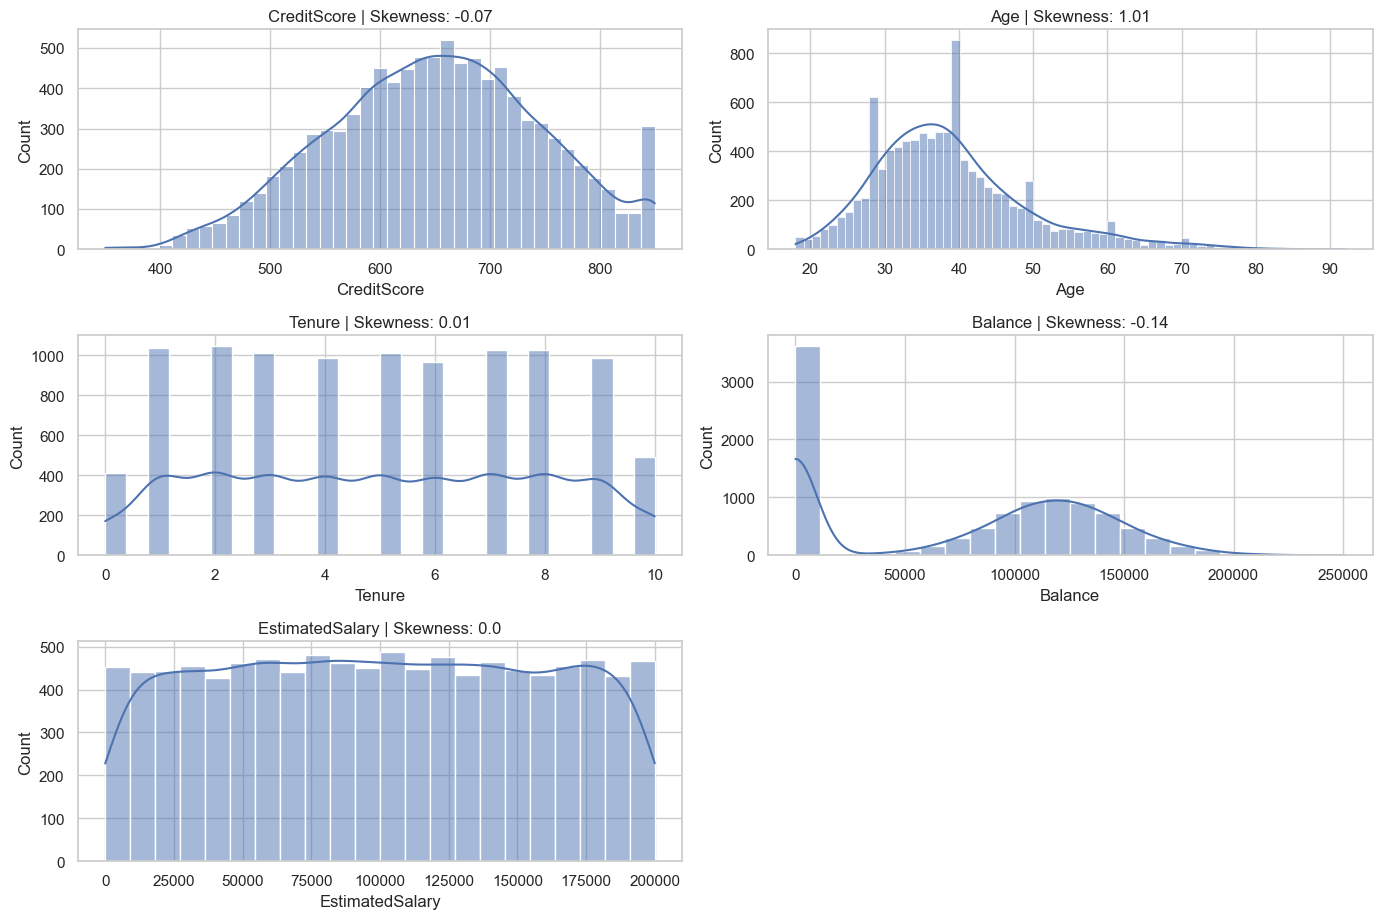

In [13]:
plt.figure(figsize=(14, len(num_vars)*3))
for idx, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 2, idx)
    sns.boxplot(x='Exited', y=var, data=churn, palette='coolwarm')
    plt.title(f'{var} Distribution by Churn')
    plt.xlabel('Exited (0 = No, 1 = Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, len(num_vars) * 3))
for idx, feature in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 2, idx)
    sns.histplot(churn[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(churn[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

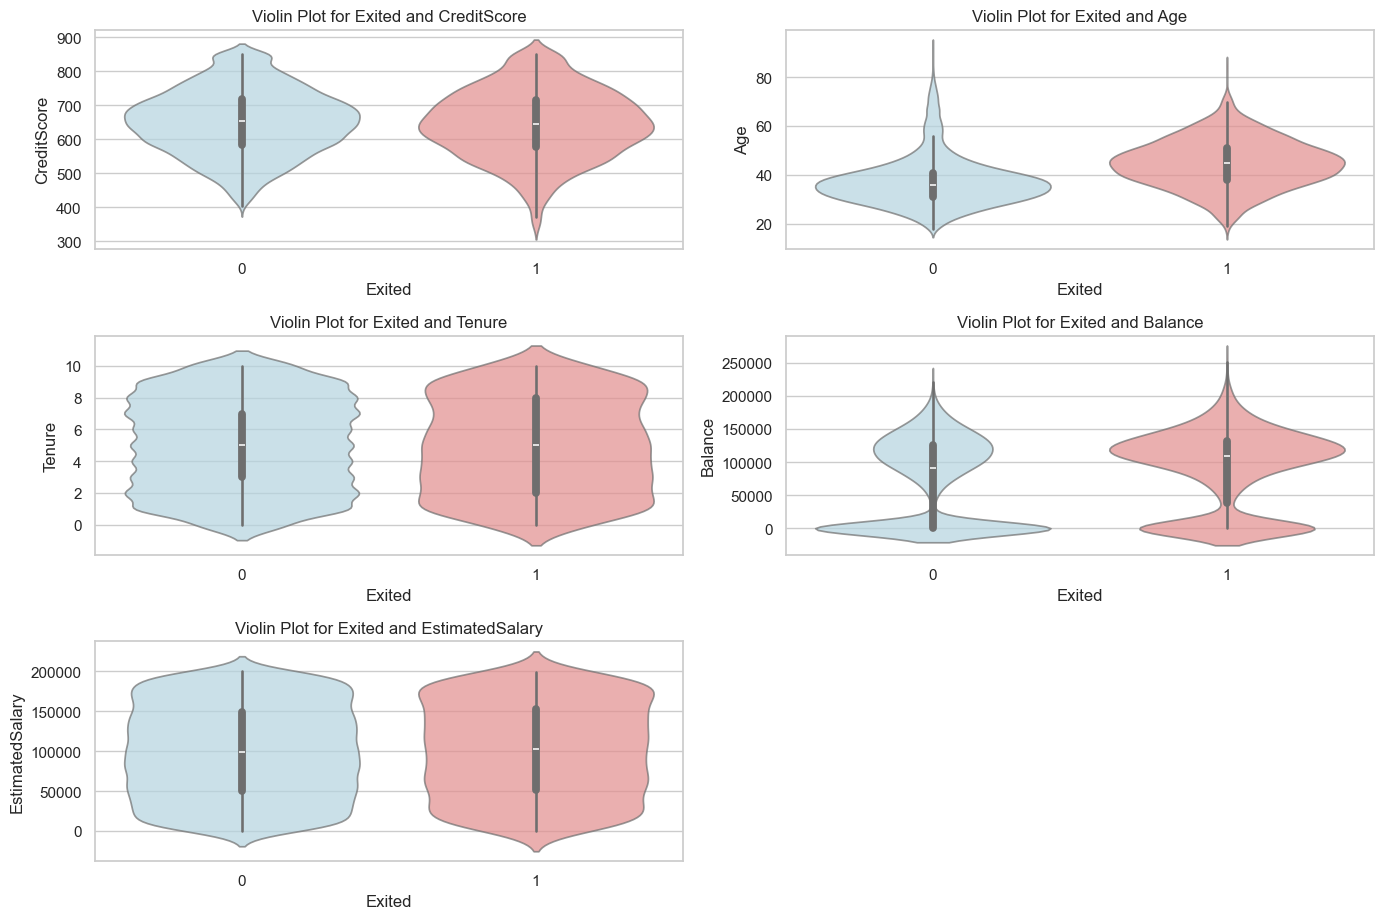

In [14]:
plt.figure(figsize=(14, len(num_vars) * 3))
for idx, feature in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 2, idx)
    sns.violinplot(x="Exited", y=feature, data=churn, palette={'0': "lightblue", "1": "lightcoral"}, alpha=0.7)
    plt.title(f"Violin Plot for Exited and {feature}")

plt.tight_layout()
plt.show()

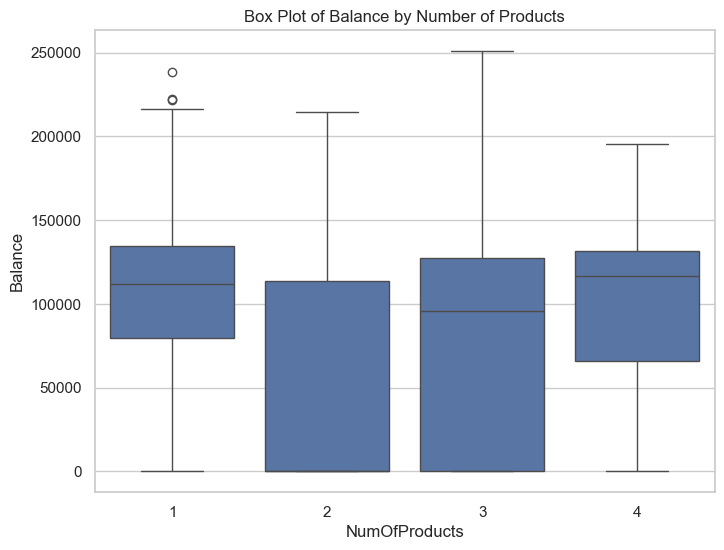

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='NumOfProducts', y='Balance', data=churn)
plt.title("Box Plot of Balance by Number of Products")
plt.show()